In [283]:
import pandas as pd 
import re
import numpy as np

In [2]:
import nltk

In [13]:
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv("test.csv")

In [213]:
def makedict():
    d ={}
    i = 0
    for item in df['id'].values:
        if item not in d.keys():
            d[item] = []
    for index, row in df.iterrows():
        cpc = row['post_caption'].replace("\\n", " ").replace('\\'," ")
        cpc = re.sub('u[1-9]....', '', cpc)
        cpc = cpc.lower()
        cpc = re.findall(r"[\w']+", cpc)
        cpc = list(filter(lambda x:x not in list(stopwords.words('english')),cpc))
        cpc = ' '.join(cpc)
        d[row['id']].append(cpc)
    for item in d.keys():
        d[item] = ' '.join(d[item])
    return d

In [210]:
def makesentences():
    d =[]
    i = 1
    for index, row in df.iterrows():
        cpc = row['post_caption'].replace("\\n", " ").replace('\\'," ")
        cpc = re.sub('u[1-9]....', '', cpc)
        cpc = cpc.lower()
        cpc = re.findall(r"[\w']+", cpc)
        d.append(cpc)
    return d

In [222]:
sentences = makesentences()

In [214]:
textdict = makedict()

KeyboardInterrupt: 

In [265]:
from sklearn.feature_extraction.text import CountVectorizer

In [271]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textdict.values())

In [267]:
from sklearn.decomposition import TruncatedSVD

In [293]:
tsvd = TruncatedSVD(n_components=2)

In [294]:
X_s = tsvd.fit_transform(X)

In [295]:
tsvd.singular_values_

array([8250.92585826, 7193.72828326])

In [290]:
np.var(X_s[:,2])

3101.211904286186

In [269]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=18,verbose=20).fit(X_s)

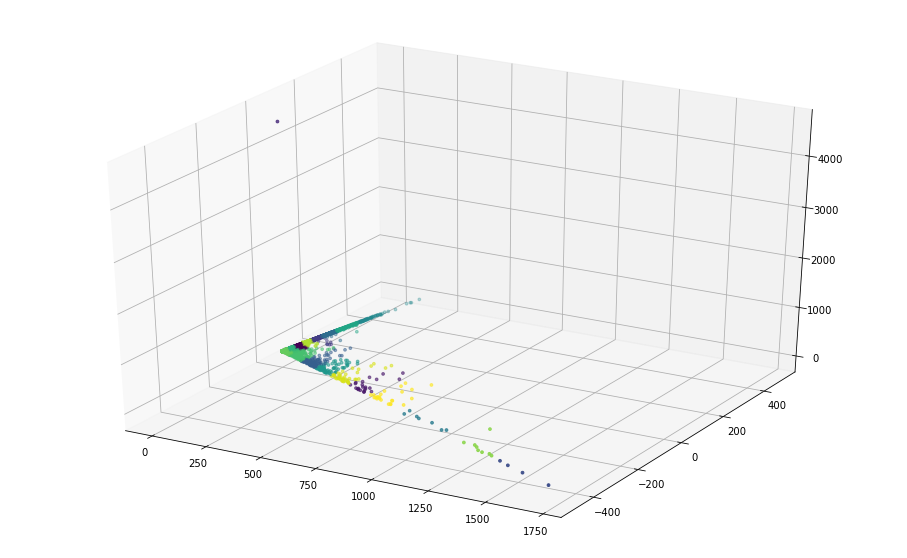

In [281]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111, projection='3d')

x = X_s[:,0]
y = X_s[:,1]
z = X_s[:,2]

ax1.scatter(x,y,z, marker=".", c=kmeans.labels_, s=30)
plt.show()

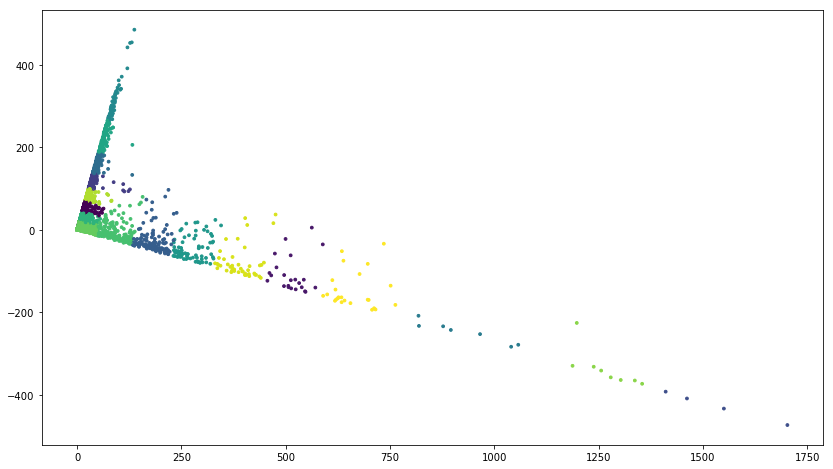

In [296]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
x = X_s[:,0]
y = X_s[:,1]
ax.scatter(x,y, marker=".", c=kmeans.labels_, s=30)
plt.show()

In [297]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [307]:
tfidf = TfidfVectorizer()

In [308]:
X = TfidfVectorizer().fit_transform(textdict.values())

In [314]:
tsvd = TruncatedSVD(n_components=2)

In [315]:
X_s = tsvd.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=18,verbose=20).fit(X_s)

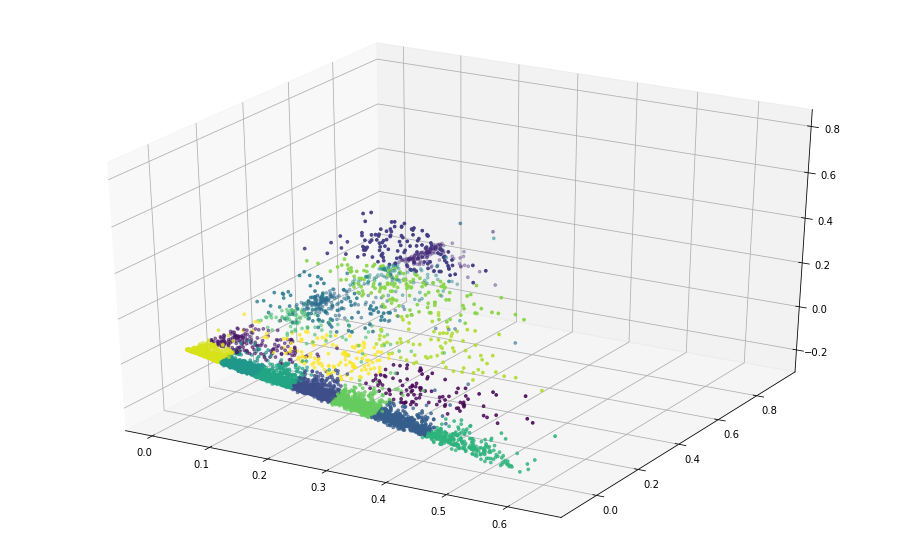

In [312]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111, projection='3d')

x = X_s[:,0]
y = X_s[:,1]
z = X_s[:,2]

ax1.scatter(x,y,z, marker=".", c=kmeans.labels_, s=30)
plt.show()

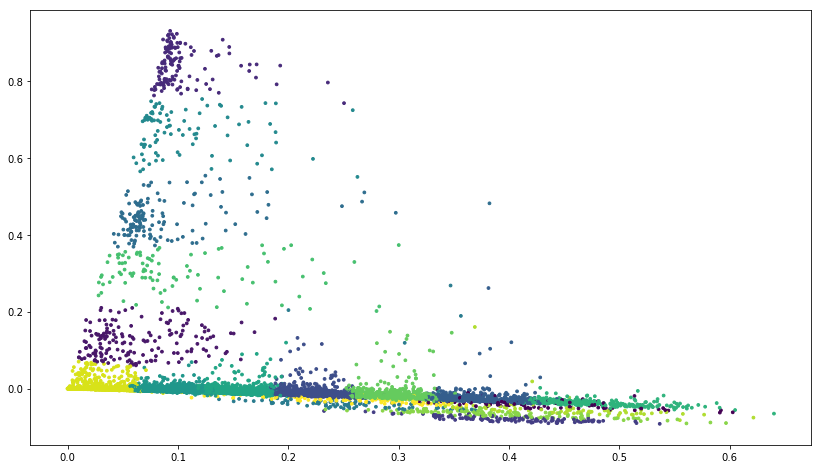

In [316]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
x = X_s[:,0]
y = X_s[:,1]
ax.scatter(x,y, marker=".", c=kmeans.labels_, s=30)
plt.show()

In [9]:
import spacy

In [216]:
import multiprocessing

In [221]:
from gensim.models import Word2Vec

In [218]:
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [219]:
cores = multiprocessing.cpu_count()


In [223]:
model = Word2Vec(min_count=1,workers=8,window=4,size=300,sample=6e-5)

In [ ]:
model.build_vocab(sentences,progress_per=10000)

In [ ]:
model.train(sentences, total_examples=model.corpus_count, epochs=30, report_delay=1)

In [236]:
model.wv.save_word2vec_format('model.txt')

INFO - 15:03:00: storing 827062x300 projection weights into model.txt
WARNING - 15:03:00: this function is deprecated, use smart_open.open instead


In [331]:
model.wv.most_similar(positive=["lol"])

[('but', 0.7805400490760803),
 ('i', 0.7717968225479126),
 ('haha', 0.7613176107406616),
 ('just', 0.7491580843925476),
 ('because', 0.7367537617683411),
 ('actually', 0.7302869558334351),
 ('really', 0.7133891582489014),
 ('it', 0.705630898475647),
 ('that', 0.7012513279914856),
 ('still', 0.6995353698730469)]

In [ ]:
!python -m spacy init-model en /tmp/custom_vectors --vectors-loc model.txt 

In [10]:
nlp = spacy.load("/tmp/custom_vectors")

In [ ]:
for stopword in list(stopwords.words('english')):
    nlp2.vocab[stopword].is_stop = True

In [25]:
def maketokens():
    xl = [value for value in textdict.values()]
    xk = [key for key in textdict.keys()]
    x = {}
    i = 0
    for index,text in enumerate(xl):
        x[xk[index]]=nlp(text)
    return x

In [ ]:
tokens = maketokens()

In [158]:
def make_similarity_index():
    xl = [value for value in tokens.values()]
    sim_index = {}
    i = 1
    for index, token in enumerate(xl):
        sim_token = []
        for doc in xl:
            sim_token.append(token.similarity(doc))
        sim_index[xk[index]] = sim_token
    return sim_index


In [ ]:
sim_index = make_similarity_index()

In [54]:
max(sim_index[xk[13]])

1.0

In [160]:
sim_columns = [i for i in sim_index.values()]
sim_column_names = [i for i in sim_index.keys()]

In [161]:
df2 = pd.DataFrame(sim_columns,columns = sim_column_names)

In [162]:
df2.index = sim_column_names

In [332]:
df2.head()

,71177,21866,4828,54883,22472,32766,2148,9418,9327,55455,...,75750,75752,75795,75908,75932,76021,76099,76122,76384,76393
71177,1.000000,0.793496,0.762100,0.790910,0.564872,0.786111,0.801433,0.783177,0.693094,0.690186,...,0.795845,0.662370,0.791859,0.791173,0.790528,0.752920,0.757408,0.800768,0.764354,0.788689
21866,0.793496,1.000000,0.958485,0.962134,0.679748,0.977228,0.975562,0.966652,0.883824,0.682497,...,0.967315,0.784236,0.964099,0.967548,0.961827,0.920823,0.934975,0.955908,0.927842,0.951683
4828,0.762100,0.958485,1.000000,0.945488,0.620695,0.962326,0.957881,0.966806,0.887384,0.642064,...,0.968005,0.804927,0.955987,0.947081,0.950362,0.883537,0.929908,0.950030,0.880965,0.961374
54883,0.790910,0.962134,0.945488,1.000000,0.645559,0.942416,0.963798,0.935320,0.818289,0.710315,...,0.960679,0.847483,0.987826,0.979807,0.989874,0.901923,0.980390,0.974867,0.898316,0.976656
22472,0.564872,0.679748,0.620695,0.645559,1.000000,0.681053,0.670126,0.642072,0.570747,0.403706,...,0.674353,0.520190,0.646636,0.651348,0.657205,0.581343,0.599486,0.660762,0.626398,0.636192


In [178]:
df2.to_csv('similarity_index_2.csv')

In [164]:
from sklearn.decomposition import PCA

In [262]:
pca = PCA(n_components = 2)

In [253]:
X = pca.fit_transform(df2)

In [167]:
pca.singular_values_

array([1676.29444395,  306.0926781 ,  154.9138242 ])

In [170]:
kmeans = KMeans(n_clusters=18,n_jobs=1).fit(df2)

In [171]:
kmeans.labels_

array([ 7,  0,  0, ...,  0, 13,  0], dtype=int32)

In [172]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

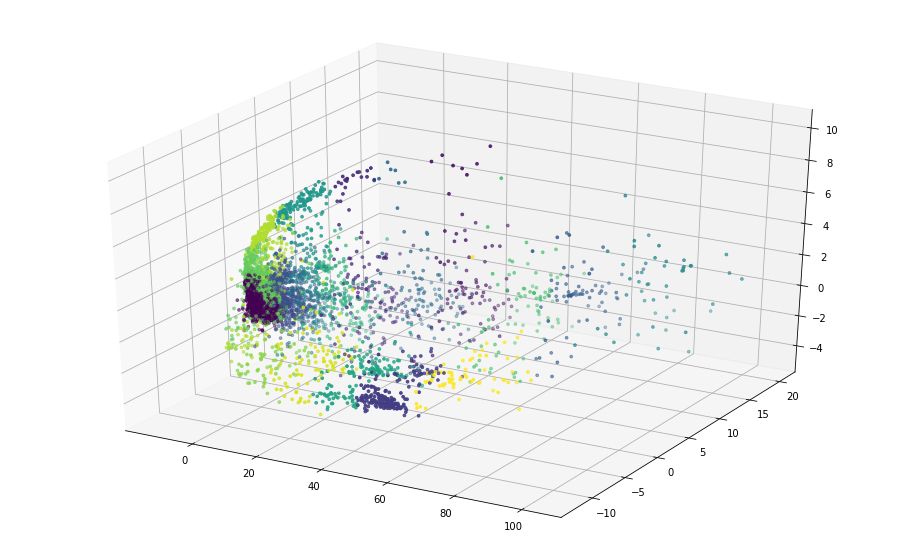

In [261]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111, projection='3d')

x = X[:,0]
y = X[:,1]
z = X[:,2]

ax1.scatter(x,y,z, marker=".", c=kmeans.labels_, s=30)
plt.show()


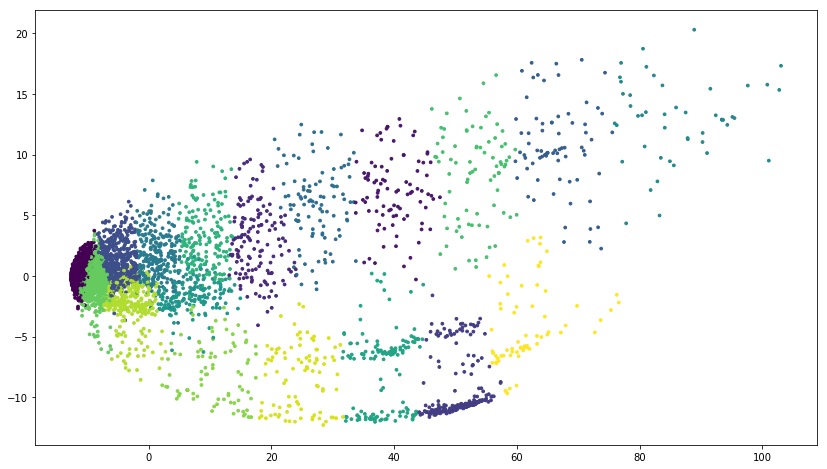

In [264]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
x = X[:,0]
y = X[:,1]
ax.scatter(x,y, marker=".", c=kmeans.labels_, s=30)
plt.show()